In [3]:
import pandas as pd
ri = pd.read_csv('ri_statewide_2020_04_01.csv')
ri.head()
ri.isnull().sum()

C:\Users\Madis\AppData\Local\Temp\ipykernel_23808\1835287841.py:2: DtypeWarning: Columns (6,17,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv('ri_statewide_2020_04_01.csv')


raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [6]:
ri.isnull().sum()

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [9]:
ri.dropna(subset=['subject_sex'], inplace=True)
ri.isnull().sum()
ri.shape

(480584, 31)

In [10]:
ri.arrest_made.head()

0    False
1    False
2    False
3    False
4    False
Name: arrest_made, dtype: object

In [11]:
ri['arrest_made'] = ri.arrest_made.astype('bool')

In [12]:
ri.arrest_made.dtype

dtype('bool')

In [14]:
combined = ri.date.str.cat(ri.time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)
ri.dtypes

raw_row_number                    int64
date                             object
time                             object
zone                             object
subject_race                     object
subject_sex                      object
department_id                    object
type                             object
arrest_made                        bool
citation_issued                  object
warning_issued                   object
outcome                          object
contraband_found                 object
contraband_drugs                 object
contraband_weapons               object
contraband_alcohol               object
contraband_other                 object
frisk_performed                  object
search_conducted                   bool
search_basis                     object
reason_for_search                object
reason_for_stop                  object
vehicle_make                     object
vehicle_model                    object
raw_BasisForStop                 object


In [15]:
ri.set_index(keys='stop_datetime', inplace=True)
ri.index
ri.columns

Index(['raw_row_number', 'date', 'time', 'zone', 'subject_race', 'subject_sex',
       'department_id', 'type', 'arrest_made', 'citation_issued',
       'warning_issued', 'outcome', 'contraband_found', 'contraband_drugs',
       'contraband_weapons', 'contraband_alcohol', 'contraband_other',
       'frisk_performed', 'search_conducted', 'search_basis',
       'reason_for_search', 'reason_for_stop', 'vehicle_make', 'vehicle_model',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne', 'raw_SearchResultTwo',
       'raw_SearchResultThree'],
      dtype='object')

In [18]:
ri.reason_for_stop.value_counts()

Speeding                            268736
Other Traffic Violation              90228
Equipment/Inspection Violation       61250
Registration Violation               19830
Seatbelt Violation                   16324
Special Detail/Directed Patrol       13642
Call for Service                      7605
Violation of City/Town Ordinance      1036
Motorist Assist/Courtesy               989
APB                                    485
Suspicious Person                      342
Warrant                                117
Name: reason_for_stop, dtype: int64

In [19]:
ri.reason_for_stop.value_counts(normalize=True)

Speeding                            0.559186
Other Traffic Violation             0.187747
Equipment/Inspection Violation      0.127449
Registration Violation              0.041262
Seatbelt Violation                  0.033967
Special Detail/Directed Patrol      0.028386
Call for Service                    0.015824
Violation of City/Town Ordinance    0.002156
Motorist Assist/Courtesy            0.002058
APB                                 0.001009
Suspicious Person                   0.000712
Warrant                             0.000243
Name: reason_for_stop, dtype: float64

In [32]:
female = ri[ri.subject_sex=='female']
male = ri[ri.subject_sex=='male']
female.reason_for_stop.value_counts(normalize=True)

Speeding                            0.522364
Other Traffic Violation             0.206948
Equipment/Inspection Violation      0.135102
Registration Violation              0.040581
Special Detail/Directed Patrol      0.037136
Seatbelt Violation                  0.036555
Call for Service                    0.014987
Violation of City/Town Ordinance    0.002347
Motorist Assist/Courtesy            0.001880
APB                                 0.001076
Suspicious Person                   0.000767
Warrant                             0.000258
Name: reason_for_stop, dtype: float64

In [36]:
male.reason_for_stop.value_counts(normalize=True)

Speeding                            0.522364
Other Traffic Violation             0.206948
Equipment/Inspection Violation      0.135102
Registration Violation              0.040581
Special Detail/Directed Patrol      0.037136
Seatbelt Violation                  0.036555
Call for Service                    0.014987
Violation of City/Town Ordinance    0.002347
Motorist Assist/Courtesy            0.001880
APB                                 0.001076
Suspicious Person                   0.000767
Warrant                             0.000258
Name: reason_for_stop, dtype: float64

In [33]:
female_and_speeding = ri[(ri.subject_sex == 'female') & (ri.reason_for_stop == 'Speeding')]
male_and_speeding = ri[(ri.subject_sex == 'male') & (ri.reason_for_stop == 'Speeding')]

In [34]:
female_and_speeding.outcome.value_counts(normalize=True)

citation    0.954609
warning     0.039059
arrest      0.006332
Name: outcome, dtype: float64

In [35]:
male_and_speeding.outcome.value_counts(normalize=True)

citation    0.946763
warning     0.036167
arrest      0.017070
Name: outcome, dtype: float64

In [37]:
ri.search_conducted.value_counts(normalize=True)

False    0.963041
True     0.036959
Name: search_conducted, dtype: float64

In [38]:
ri.search_conducted.mean()

0.036959199640437465

In [41]:
ri[ri.subject_sex=='female'].search_conducted.mean()

0.018751239152648355

In [42]:
ri[ri.subject_sex=='male'].search_conducted.mean()

0.04379217389811301

In [43]:
ri.groupby(ri.subject_sex).search_conducted.mean()

subject_sex
female    0.018751
male      0.043792
Name: search_conducted, dtype: float64

In [45]:
ri.groupby(['reason_for_stop', 'subject_sex']).search_conducted.mean()

reason_for_stop                   subject_sex
APB                               female         0.165138
                                  male           0.255319
Call for Service                  female         0.042230
                                  male           0.092419
Equipment/Inspection Violation    female         0.040245
                                  male           0.070916
Motorist Assist/Courtesy          female         0.033133
                                  male           0.089802
Other Traffic Violation           female         0.038021
                                  male           0.059156
Registration Violation            female         0.054700
                                  male           0.103589
Seatbelt Violation                female         0.017746
                                  male           0.031705
Special Detail/Directed Patrol    female         0.018045
                                  male           0.010249
Speeding                  

In [47]:
ri.reason_for_search.value_counts()

Incident to Arrest                                          6998
Probable Cause                                              2063
Odor of Drugs/Alcohol                                       1872
Reasonable Suspicion                                        1141
Inventory/Tow                                               1101
                                                            ... 
Reasonable Suspicion|Inventory/Tow|Odor of Drugs/Alcohol       1
Odor of Drugs/Alcohol|Inventory/Tow|Reasonable Suspicion       1
Terry Frisk|Reasonable Suspicion|Odor of Drugs/Alcohol         1
Plain View|Reasonable Suspicion|Odor of Drugs/Alcohol          1
Reasonable Suspicion|Incident to Arrest|Probable Cause         1
Name: reason_for_search, Length: 188, dtype: int64

In [55]:
ri['frisk'] = ri.reason_for_search.str.contains('Frisk', na=False)
ri.frisk.head()

stop_datetime
2005-11-22 11:15:00    False
2005-10-01 12:20:00    False
2005-10-01 12:30:00    False
2005-10-01 12:50:00    False
2005-10-01 13:10:00    False
Name: frisk, dtype: bool

In [53]:
ri.frisk.sum()

1598

In [57]:
searched = ri[ri.search_conducted == True]
searched.frisk.mean()

0.08996734601959239

In [58]:
searched.groupby(searched.subject_sex).frisk.mean()

subject_sex
female    0.066694
male      0.093707
Name: frisk, dtype: float64

In [59]:
ri.arrest_made.mean()

0.03454755048024903

In [60]:
hourly_arrest_rate = ri.groupby(ri.index.hour).arrest_made.mean()

<AxesSubplot:xlabel='stop_datetime'>

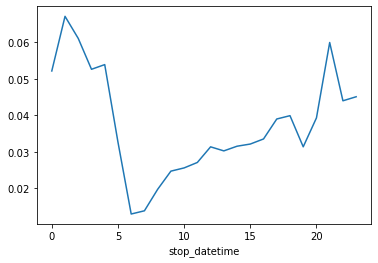

In [61]:
import matplotlib.pyplot as plt
hourly_arrest_rate.plot()

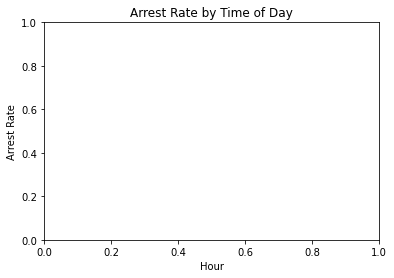

In [64]:
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
plt.show()

In [66]:
ri.dtypes

raw_row_number            int64
date                     object
time                     object
zone                     object
subject_race             object
subject_sex              object
department_id            object
type                     object
arrest_made                bool
citation_issued          object
warning_issued           object
outcome                  object
contraband_found         object
contraband_drugs         object
contraband_weapons       object
contraband_alcohol       object
contraband_other         object
frisk_performed          object
search_conducted           bool
search_basis             object
reason_for_search        object
reason_for_stop          object
vehicle_make             object
vehicle_model            object
raw_BasisForStop         object
raw_OperatorRace         object
raw_OperatorSex          object
raw_ResultOfStop         object
raw_SearchResultOne      object
raw_SearchResultTwo      object
raw_SearchResultThree    object
frisk   

<AxesSubplot:xlabel='stop_datetime'>

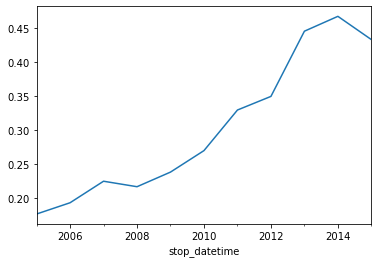

In [67]:
annual_drug_rate = ri.contraband_drugs.resample('A').mean()
annual_drug_rate.plot()

array([<AxesSubplot:xlabel='stop_datetime'>,
       <AxesSubplot:xlabel='stop_datetime'>], dtype=object)

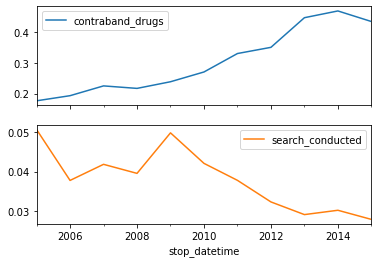

In [68]:
annual_search_rate = ri.search_conducted.resample('A').mean()
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')
annual.plot(subplots=True)

In [71]:
all_zones = pd.crosstab(ri.zone, ri.reason_for_stop)
k_zones = all_zones.loc['K1':'K3']

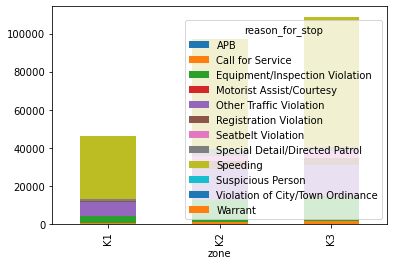

In [75]:
k_zones.plot(kind='bar', stacked = True)
plt.show()